<a href="https://colab.research.google.com/github/alphaameer007/RHM_FYP/blob/main/RHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from tcn import TCN, tcn_full_summary
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [5]:
df=pd.read_csv('T2.csv')
df

,time,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,1/1/2018 0:00,380.047791,5.311336,416.328908,259.994904
1,1/1/2018 0:10,453.769196,5.672167,519.917511,268.641113
2,1/1/2018 0:20,306.376587,5.216037,390.900016,272.564789
3,1/1/2018 0:30,419.645904,5.659674,516.127569,271.258087
4,1/1/2018 0:40,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...,...
52555,12/31/2018 23:10,2963.980957,11.404030,3397.190793,80.502724
52556,12/31/2018 23:20,1684.353027,7.332648,1173.055771,84.062599
52557,12/31/2018 23:30,2201.106934,8.435358,1788.284755,84.742500
52558,12/31/2018 23:40,2515.694092,9.421366,2418.382503,84.297913


In [6]:
df.drop('time', inplace=True, axis=1)

In [7]:
df

,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,380.047791,5.311336,416.328908,259.994904
1,453.769196,5.672167,519.917511,268.641113
2,306.376587,5.216037,390.900016,272.564789
3,419.645904,5.659674,516.127569,271.258087
4,380.650696,5.577941,491.702972,265.674286
...,...,...,...,...
52555,2963.980957,11.404030,3397.190793,80.502724
52556,1684.353027,7.332648,1173.055771,84.062599
52557,2201.106934,8.435358,1788.284755,84.742500
52558,2515.694092,9.421366,2418.382503,84.297913


In [8]:
raw_data=df

In [10]:
num_train_samples = int(0.5 * len(raw_data))
num_val_samples = int(0.25 * len(raw_data))
num_test_samples = len(raw_data) - num_train_samples - num_val_samples

In [12]:
mean = raw_data.mean(axis=0)
raw_data -= mean
std = raw_data.std(axis=0)
raw_data /= std

In [13]:
raw_data

,LV ActivePower (kW),Wind Speed (m/s),wind energy,Wind Direction (°)
0,-0.746271,-0.534809,-0.814109,1.480642
1,-0.688842,-0.448718,-0.737507,1.573494
2,-0.803662,-0.557546,-0.832913,1.615630
3,-0.715424,-0.451699,-0.740310,1.601597
4,-0.745802,-0.471199,-0.758371,1.541633
...,...,...,...,...
52555,1.266630,0.918847,1.390174,-0.446921
52556,0.269791,-0.052544,-0.254526,-0.408691
52557,0.672346,0.210552,0.200423,-0.401390
52558,0.917412,0.445803,0.666367,-0.406164


In [21]:
target=raw_data['LV ActivePower (kW)']
target

0       -0.746271
1       -0.688842
2       -0.803662
3       -0.715424
4       -0.745802
           ...   
52555    1.266630
52556    0.269791
52557    0.672346
52558    0.917412
52559    1.154831
Name: LV ActivePower (kW), Length: 52560, dtype: float64

In [28]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256
train_dataset = keras.utils.timeseries_dataset_from_array(
      raw_data[:],
      targets=target[delay:],
      sampling_rate=sampling_rate,
      sequence_length=sequence_length,
      shuffle=True,
      batch_size=batch_size,
      start_index=0,
      end_index=num_train_samples)
val_dataset = keras.utils.timeseries_dataset_from_array(
 raw_data[:],
 targets=target[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=num_train_samples,
 end_index=num_train_samples + num_val_samples)
test_dataset = keras.utils.timeseries_dataset_from_array(
 raw_data[:],
 targets=target[delay:],
 sampling_rate=sampling_rate,
 sequence_length=sequence_length,
 shuffle=True,
 batch_size=batch_size,
 start_index=num_train_samples + num_val_samples)

In [29]:
train_dataset

<BatchDataset element_spec=(TensorSpec(shape=(None, None, 4), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [31]:
for samples, targets in train_dataset:

  print("samples shape:", samples.shape)
  print("targets shape:", targets.shape)
  break

samples shape: (256, 120, 4)
targets shape: (256,)


In [32]:
target

0       -0.746271
1       -0.688842
2       -0.803662
3       -0.715424
4       -0.745802
           ...   
52555    1.266630
52556    0.269791
52557    0.672346
52558    0.917412
52559    1.154831
Name: LV ActivePower (kW), Length: 52560, dtype: float64

In [ ]:
scheduler = tf.keras.optimizers.schedules.ExponentialDecay(1e-3, 1000, 1e-5)
model = keras.models.Sequential([
    TCN(input_shape=(120,4),#5day 4 features
        kernel_size=10,
        nb_filters=32,
        dilations=[1, 2, 4, 8,16],
        padding='causal',
        activation='relu',
        return_sequences=True,
        nb_stacks=2,
        use_skip_connections=False,
        use_batch_norm=False,
        use_weight_norm=False,
        use_layer_norm=False
        ),
    keras.layers.Dense(1)
])

model.summary()
model.compile(optimizer="adam", loss="mape",
                  metrics=keras.metrics.MeanAbsolutePercentageError())

print('Train...')
history=model.fit(train_dataset,
                  epochs=30,
                  verbose=2,
                  batch_size=256,
                  validation_data=val_dataset,
                  callbacks=[tf.keras.callbacks.LearningRateScheduler(scheduler)])



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 tcn_6 (TCN)                 (None, 120, 32)           196640    
                                                                 
 dense_6 (Dense)             (None, 120, 1)            33        
                                                                 
Total params: 196,673
Trainable params: 196,673
Non-trainable params: 0
_________________________________________________________________
Train...
Epoch 1/30
100/100 - 196s - loss: 576.2092 - mean_absolute_percentage_error: 576.2094 - val_loss: 286.9449 - val_mean_absolute_percentage_error: 286.9449 - lr: 0.0010 - 196s/epoch - 2s/step
Epoch 2/30
100/100 - 200s - loss: 278.5720 - mean_absolute_percentage_error: 278.5719 - val_loss: 216.1235 - val_mean_absolute_percentage_error: 216.1235 - lr: 9.8855e-04 - 200s/epoch - 2s/step
Epoch 3/30
100/100 - 189s - loss: 204.6963 - mean_a

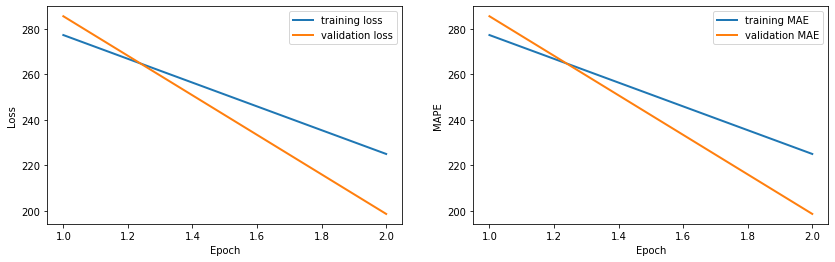

In [47]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[1:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[1:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[1:,"mean_absolute_percentage_error"], lw=2, label='training MAE')
plt.plot(logs.loc[1:,"val_mean_absolute_percentage_error"], lw=2, label='validation MAE')
plt.xlabel("Epoch")
plt.ylabel("MAPE")
plt.legend(loc='upper right')
plt.show()

In [ ]:
wind = wind.reshape( wind.shape[0],(wind.shape[1]*wind.shape[2]))


In [ ]:
y_test = RS.inverse_transform(y_test)
wind = RS.inverse_transform(wind)

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(y_test,label='actual')
plt.plot(wind,label='predicted')
plt.legend()
plt.show()